In [147]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# load data set
#df=pd.read_csv(r'C:\knG FsL khN\Materials\SE5\ML\dataset')
#df=pd.read_csv(r'C:\knG FsL khN\Materials\SE5\ML\dataset\microsoft_stocks.csv')
#df=pd.read_csv(r'C:\Users\Dr. Fazal Kakar\Desktop\exams.csv')
df=pd.read_csv(r'C:\Users\Dr. Fazal Kakar\Downloads\newhousing\newhousing.csv')
#"C:\Users\Dr. Fazal Kakar\Downloads\newhousing\newhousing.csv"
print(df.isnull().values.any())
df.head()

False


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


<AxesSubplot:>

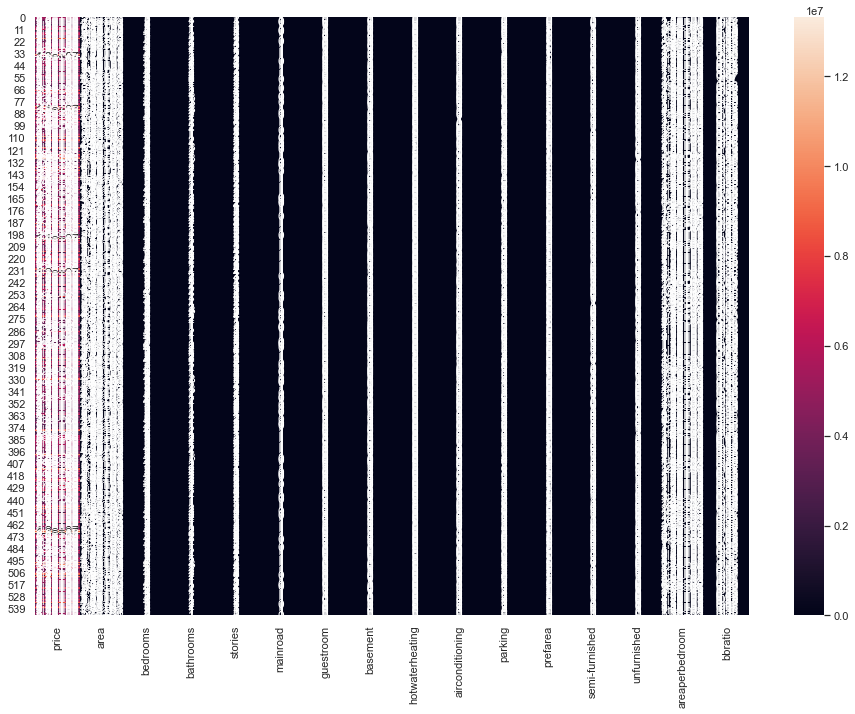

In [149]:
#heat map
plt.figure(figsize=(16,11))
sns.heatmap(df, annot=True)

c:\Users\Dr. Fazal Kakar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


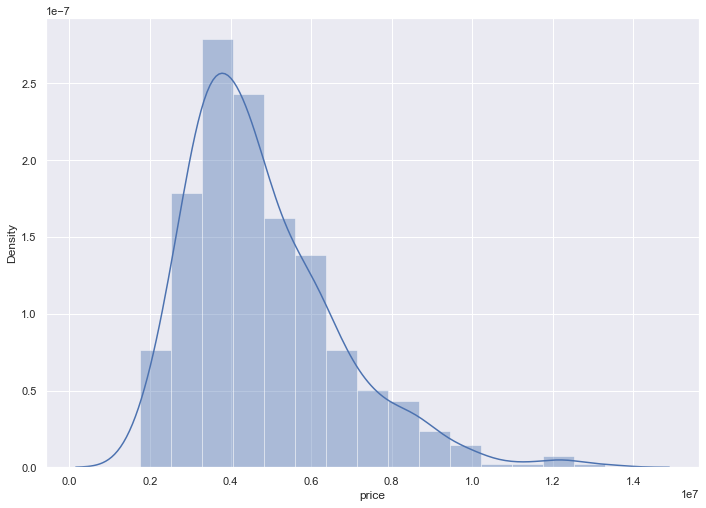

In [150]:
#sns.displot(df['price'], bins=20 )
# Plotting(histogram)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['price'], bins=15)
plt.show()

                 price  area  bedrooms  bathrooms  stories  mainroad  \
price             1.00  0.54      0.37       0.52     0.42      0.30   
area              0.54  1.00      0.15       0.19     0.08      0.29   
bedrooms          0.37  0.15      1.00       0.37     0.41     -0.01   
bathrooms         0.52  0.19      0.37       1.00     0.33      0.04   
stories           0.42  0.08      0.41       0.33     1.00      0.12   
mainroad          0.30  0.29     -0.01       0.04     0.12      1.00   
guestroom         0.26  0.14      0.08       0.13     0.04      0.09   
basement          0.19  0.05      0.10       0.10    -0.17      0.04   
hotwaterheating   0.09 -0.01      0.05       0.07     0.02     -0.01   
airconditioning   0.45  0.22      0.16       0.19     0.29      0.11   
parking           0.38  0.35      0.14       0.18     0.05      0.20   
prefarea          0.33  0.23      0.08       0.06     0.04      0.20   
semi-furnished    0.06  0.01      0.05       0.03    -0.00      

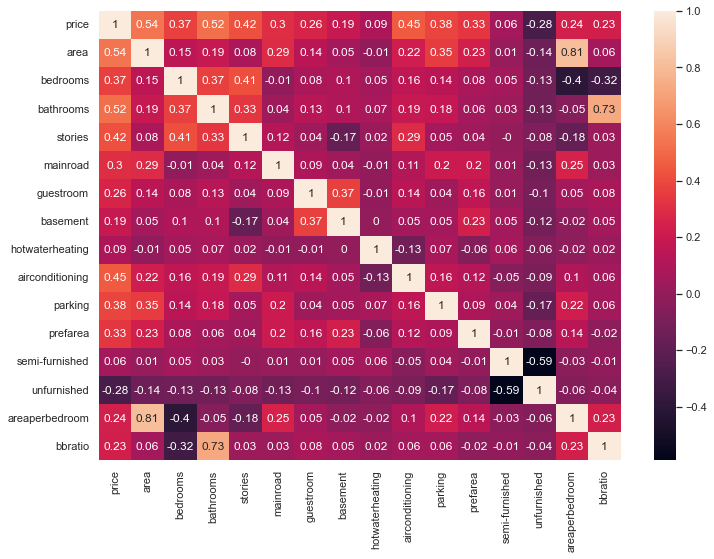

In [151]:
# Plotting (Correlation)
correlation_matrix = df.corr().round(2)
print(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


In [152]:
#Split data
X=df.drop('price', axis=1)
y=df['price']

print('Shape of X =', X.shape)
print('Shape of y = ', y.shape)
#print ('price', y)


Shape of X = (545, 15)
Shape of y =  (545,)


In [153]:
# Split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print('Shape of X_train =', X_train.shape)
print('Shape of y_train =', y_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of y_test =', y_test.shape)






Shape of X_train = (436, 15)
Shape of y_train = (436,)
Shape of X_test = (109, 15)
Shape of y_test = (109,)


In [154]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [155]:
# creating Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# for learning coef and intercept value(beta 0, beta 1) fit method will use.
lr.fit(X_train, y_train)




LinearRegression()

In [156]:
# we will that our machine learn (beta 0 to .. value) of mention feature
lr.coef_

array([ 769939.09738269, -101902.49796397,  526521.93932654,
        395618.80749709,  126988.58268441,   96648.55086825,
        163956.36934178,  198866.17720494,  377965.72627371,
        192687.77993457,  240709.64972678,  -23431.28235224,
       -234324.57349095, -273260.5635363 ,  -33640.57734928])

In [157]:
# we will check, which intercept value our machine learned
lr.intercept_

4738268.211009175

In [158]:
# We can check single house information
X_test[1, :]

array([-0.38557859, -1.26424392, -0.57643119, -0.89869656,  0.39559913,
       -0.45580284,  1.38786689, -0.23598744, -0.66970515, -0.80833429,
       -0.53136893, -0.83456459,  1.39497166,  0.37140728,  0.32806798])

In [159]:
# predict house price 
# but here we predicting 1st house price with all given feature(columns)
lr.predict([X_test[0, :]])

array([5440436.16543719])

In [160]:
# predicting multiple house 
lr.predict(X_test)

array([5440436.16543719, 3141348.5047288 , 4312960.22822921,
       3729096.056173  , 7867189.16384628, 6210489.18182946,
       5106108.04098106, 2570304.66386503, 3935339.14598013,
       3946014.65797298, 7696442.95651769, 2730154.82983579,
       6919332.73849379, 3920285.86217157, 2383672.34874248,
       3503406.13361582, 4160874.12056589, 8122371.08782985,
       6530220.44160054, 4713382.35888695, 5028673.79570145,
       6150103.24107219, 7106177.30812584, 7336540.03672401,
       2695351.44327804, 4372395.12058384, 2687393.09125094,
       4642579.70577592, 4796856.92067373, 2164394.33208533,
       5867934.42891289, 6557686.16475229, 2266521.07978036,
       7029679.53696094, 4979410.45305748, 6925501.88889624,
       3821533.68658698, 4936976.86729742, 3157382.76270532,
       4439839.39493248, 5628335.83434163, 3513474.05179177,
       4327485.46498061, 4188237.40380937, 4616241.19395527,
       2951075.91879855, 6942294.88199941, 6191310.98563346,
       3549538.86784722,

In [161]:
y_test

333    4620000
37     4865000
396    4165000
494    4445000
536    6615000
        ...   
269    5495000
472    6650000
521    3118850
145    9800000
244    6615000
Name: price, Length: 109, dtype: int64

In [162]:
#Accuracy
lr.score(X_test, y_test)

0.6696932943896529

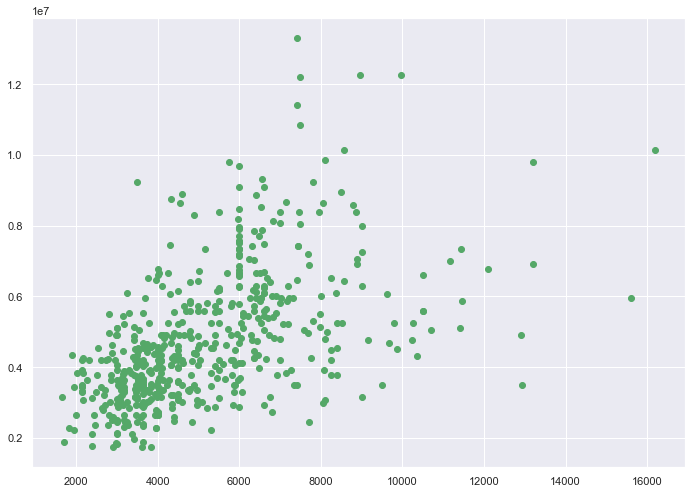

In [163]:
#plt.scatter(df, 'price')
plt.scatter(X['area'], y , color='g')
#plt.show


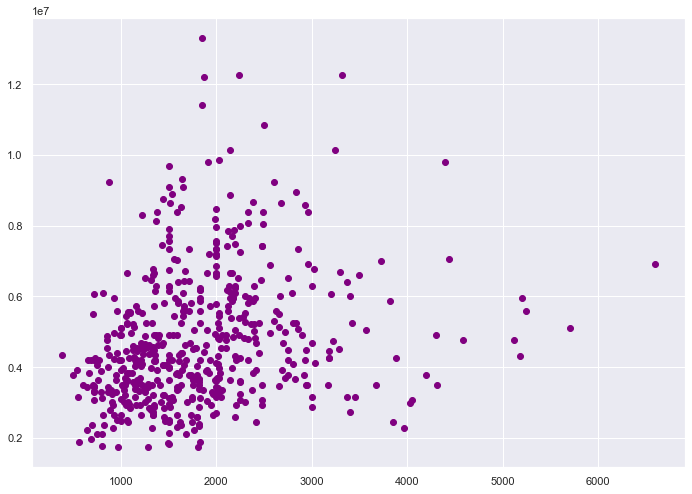

In [164]:
plt.scatter(X['areaperbedroom'], y , color='purple')
plt.show()
